In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('./14_fire_data.csv')
df2 = pd.read_csv('./15_22_fire_data.csv')

In [3]:
df1.head()

,ocurdt,ocurdo,ocursgg,ocuremd,ocurcause,dmgarea,riskavg,riskmax,tempavg,humidcurr,humidrel,humidmin,windmax,windavg,diravg,raindays
0,201406191500,강원,인제,남,쓰레기소각,0.19,0.0,0.0,23.6,0.0,57.0,0.0,5.6,1.9,SE,6
1,201406181805,경남,밀양,삼랑진,담뱃불실화 추정,0.08,0.0,0.0,29.6,0.0,46.0,0.0,4.0,2.4,NNE,6
2,201406151410,강원,인제,인제,도로공사(용접불티)비화,0.05,0.0,0.0,29.3,0.0,57.0,0.0,6.7,1.3,NW,2
3,201406141720,전북,부안,보안,등산객실화 추정,0.03,0.0,0.0,25.3,0.0,46.0,0.0,7.8,3.3,WNW,3
4,201406101718,강원,원주,흥업,낙뢰추정,0.01,0.0,0.0,22.3,0.0,40.0,0.0,9.9,2.0,NNE,1


In [4]:
df2.head()

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear
0,0.01,11,3,21:30:00,2015,쓰레기소각,산2-5,원당,광주,퇴촌,경기,11,수요일,3,19:15:00,2015
1,0.25,11,3,23:10:00,2015,담뱃불실화,산65-1,웅천,기장,철마,부산,11,수요일,3,21:14:00,2015
2,0.10,12,3,07:55:00,2015,기타,산28,덕곡,상주,모동,경북,12,목요일,3,06:35:00,2015
3,2.00,12,3,16:45:00,2015,기타,산51-1,남회룡,봉화,소천,경북,12,목요일,3,10:43:00,2015
4,0.06,12,3,12:30:00,2015,쓰레기소각,산8,여차,강화,화도,인천,12,목요일,3,11:25:00,2015


In [5]:
df1.shape, df2.shape

((6362, 16), (4564, 16))

In [6]:
df2['startyear'].value_counts()

2022    740
2017    692
2019    653
2015    623
2020    620
2018    496
2016    391
2021    349
Name: startyear, dtype: int64

In [7]:
df2['damagearea'].max()

16301.98

In [8]:
df2[df2['damagearea'] == df2['damagearea'].max()]

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear
3274,16301.98,13,3,18:00:00,2022,기타,산22,두천,울진,북,경북,4,금요일,3,11:17:00,2022


In [9]:
df1['ocurdt'] = pd.to_datetime(df1['ocurdt'].astype(str))

In [10]:
df1['startyear'] = df1['ocurdt'].dt.year

In [11]:
df1_dmgarea = df1[['startyear', 'dmgarea']]

In [12]:
df2_dmgarea = df2[['startyear', 'damagearea']]
df2_dmgarea = df2_dmgarea.rename(columns={'damagearea':'dmgarea'})

In [13]:
dmgarea = pd.concat([df1_dmgarea, df2_dmgarea])

In [14]:
dmgarea

,startyear,dmgarea
0,2014,0.19
1,2014,0.08
2,2014,0.05
3,2014,0.03
4,2014,0.01
...,...,...
4559,2021,0.03
4560,2021,0.10
4561,2021,0.02
4562,2021,0.10


In [32]:
dmgarea_mean = dmgarea.groupby('startyear').mean()
dmgarea_mean.reset_index(drop=False, inplace=True)
dmgarea_mean

,startyear,dmgarea
0,2000,3.312347
1,2001,1.237268
2,2002,2.076468
3,2003,0.490221
4,2004,2.972650
5,2005,4.493948
6,2006,0.569942
7,2007,0.455963
8,2008,0.504047
9,2009,1.345084


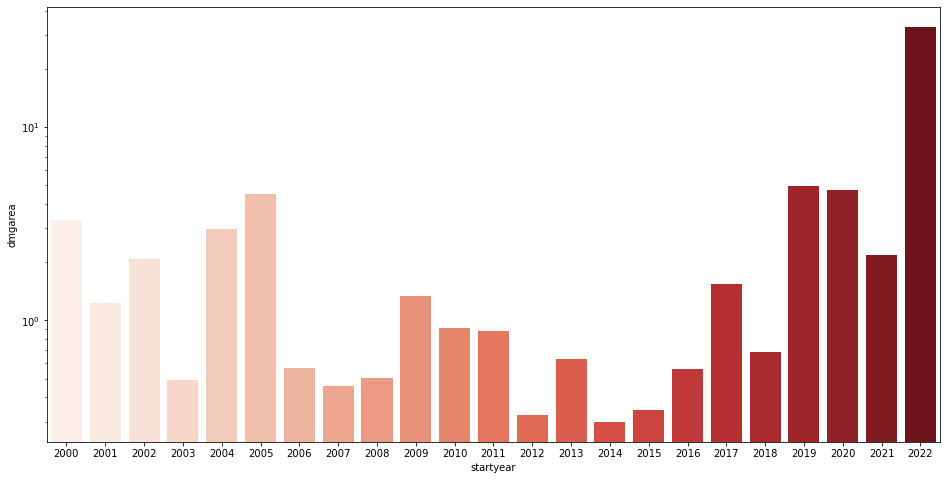

In [34]:
plt.figure(figsize=(16, 8))

sns.barplot(data=dmgarea_mean, x='startyear', y='dmgarea', palette='Reds')
plt.yscale('log')
plt.show()

In [71]:
dmgarea_top10 = dmgarea.groupby('startyear').mean().sort_values(by='dmgarea', ascending=False)[:10]
dmgarea_top10 = dmgarea_top10.reset_index(drop=False)
dmgarea_top10['startyear'] = dmgarea_top10['startyear'].astype(str)

In [91]:
dmgarea_top10['dmgarea'] = np.log(dmgarea_top10['dmgarea'])

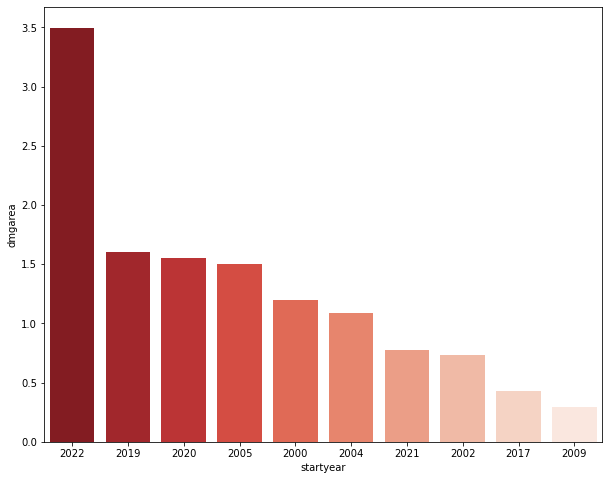

In [92]:
plt.figure(figsize=(10, 8))

sns.barplot(data=dmgarea_top10, x='startyear', y='dmgarea', palette='Reds_r')
plt.show()